# 🧱 Ali4Concrete – ACI ATT L1 Aggregate Testing Calculator  

**Brand:** Ali4Concrete | **Engineer:** Ali Abdulameer Mohammed  
**Scope:** ASTM / AASHTO Aggregate Testing (D75, C702, C117, C136, C127, C128, C566, C40)  

📧 **Email:** [ali4.concrete.ai@gmail.com](mailto:ali4.concrete.ai@gmail.com)  
📞 **WhatsApp:** [+964 771 601 6272](https://wa.me/9647716016272)  
🔗 **YouTube:** [youtube.com/@Ali4Concrete](https://www.youtube.com/@Ali4Concrete)  
🔗 **LinkedIn:** [linkedin.com/in/ali4concrete](https://www.linkedin.com/in/ali4concrete/)  
🔗 **Facebook:** [facebook.com/Ali4Concrete.Official](https://www.facebook.com/Ali4Concrete.Official)  

---

*منصة علي فور كونكريت – دليل فحوصات ركام الخرسانة وفق ASTM / AASHTO*  
🔹 تدريب | 🔹 فحوصات | 🔹 توحيد إجراءات | 🔹 تطوير فني ومهني  

📺 تابع منصاتنا للتدريب والفحوصات الفنية:  
➡️ [يوتيوب علي فور كونكريت](https://www.youtube.com/@Ali4Concrete)  
➡️ [لينكدإن علي فور كونكريت](https://www.linkedin.com/in/ali4concrete/)  
➡️ [فيسبوك علي فور كونكريت](https://www.facebook.com/Ali4Concrete.Official)  
📩 للتواصل المهني: [ali4.concrete.ai@gmail.com](mailto:ali4.concrete.ai@gmail.com) | واتساب: [+964 771 601 6272](https://wa.me/9647716016272)  

---

© 2025 **Ali4Concrete** – All Rights Reserved  
*Developing the Future of Concrete Testing, Training, and Standards*



# ACI Aggregate Testing Technician – Level 1 – Calculator (Ali4Concrete)
**Standards:** AASHTO/ASTM pairs — T2/D75, T248/C702, T11/C117, T27/C136, T85/C127, T84/C128, T255/C566, T21/C40  
**Units:** SI (kg, g, mm, °C)  
**Author:** Ali4Concrete — *Training & Testing*

### How to use (zero‑Python)
1. Use the section **📥 Input — (Edit here)** under each test.
2. Change only the numbers (units shown). Do not change code lines.
3. Press **Shift+Enter** to run the cell. Then run the **▶ Calculate** cell.

---
**Index**
- [Common Setup](#common-setup)
- [T2/D75 — Sampling (no calculations)](#d75)
- [T248/C702 — Sample Reduction](#c702)
- [T11/C117 — % Finer (75 μm)](#c117)
- [T27/C136 — Sieve Analysis + FM](#c136)
- [T85/C127 — SG & Absorption (Coarse)](#c127)
- [T84/C128 — SG & Absorption (Fine)](#c128)
- [T255/C566 — Moisture (Drying)](#c566)
- [T21/C40 — Organic Impurities (qualitative)](#c40)
- [Exports](#exports)


## Common Setup<a id='common-setup'></a>

In [15]:

# Do this once after opening the notebook
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional widgets (safe if not installed)
try:
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output
    WIDGETS_OK = True
except Exception:
    WIDGETS_OK = False

pd.set_option("display.float_format", lambda v: f"{v:,.3f}")
print("Ready. Widgets available?" , WIDGETS_OK)


Ready. Widgets available? True


### Utilities

In [16]:

WATER_DENSITY_20C = 998.2  # kg/m3 at ~20 °C

def pct(x): 
    return 100.0 * x

def safe_div(a, b):
    a = float(a); b = float(b)
    return a / b if b != 0 else float("nan")

def round_to(x, n=3):
    try:
        return float(np.round(x, n))
    except Exception:
        return x

def check_sum_100(series, tol=0.3):
    s = float(series.sum())
    return s, abs(s - 100.0) <= tol

def banner(msg):
    print("="*8, msg, "="*8)



## T2/D75 — Sampling of Aggregates<a id='d75'></a>
- **No** numeric results. Record **where**, **how**, **how many increments**, and **mass** of field sample.  
- Use this section to store sampling metadata for your report.


In [17]:

# 📥 Input — (Edit here)
project_id      = "Proj‑001"
source_desc     = "Pit A, conveyor head"
date_sampled    = "2025-10-16"
material_type   = "Coarse / Fine / Combined"
increments_n    = 5
field_mass_kg   = 60.0
notes_sampling  = "Randomized per D3665; increments after discharge; PPE used."

# ▶ Record (prints a simple summary)
banner("D75 Sampling Summary")
print("Project:", project_id)
print("Source:", source_desc)
print("Date:", date_sampled)
print("Material:", material_type)
print("Increments (n):", increments_n)
print("Field mass (kg):", field_mass_kg)
print("Notes:", notes_sampling)


======== D75 Sampling Summary ========
Project: Proj‑001
Source: Pit A, conveyor head
Date: 2025-10-16
Material: Coarse / Fine / Combined
Increments (n): 5
Field mass (kg): 60.0
Notes: Randomized per D3665; increments after discharge; PPE used.



## T248/C702 — Reducing Samples to Testing Size<a id='c702'></a>
- Plan halving/splitting until reaching test mass.
- **Formulas:** test_mass ≈ field_mass / 2ⁿ ; reduction ratio = test_mass / field_mass.


In [18]:

# 📥 Input — (Edit here)
field_mass_kg   = 60.0
target_mass_kg  = 5.0

# ▶ Calculate
def c702_splits(field_mass, target_mass):
    if target_mass <= 0 or field_mass <= 0:
        return None
    n = 0; mass = field_mass
    path = [mass]
    while mass > target_mass:
        mass = mass / 2.0
        n += 1
        path.append(round_to(mass,3))
    return {
        "splits_needed": n, 
        "approx_final_mass_kg": round_to(mass, 3),
        "reduction_ratio": round_to(mass/field_mass, 3),
        "path_kg": path
    }

res_c702 = c702_splits(field_mass_kg, target_mass_kg)
banner("C702 Plan")
print(res_c702)


======== C702 Plan ========
{'splits_needed': 4, 'approx_final_mass_kg': 3.75, 'reduction_ratio': 0.062, 'path_kg': [60.0, 30.0, 15.0, 7.5, 3.75]}



## T11/C117 — Materials Finer than 75 μm by Washing<a id='c117'></a>
**% finer** = ((m_before_dry − m_after_wash_dry) / m_before_dry) × 100


In [19]:

# 📥 Input — (Edit here)
m_before_dry_kg      = 0.500
m_after_wash_dry_kg  = 0.492

# ▶ Calculate
pct_finer = round_to( ( (m_before_dry_kg - m_after_wash_dry_kg) / m_before_dry_kg ) * 100.0 , 2)
banner("C117 Result")
print("% Finer (<75 μm):", pct_finer)


======== C117 Result ========
% Finer (<75 μm): 1.6



## T27/C136 — Sieve Analysis of Fine and Coarse Aggregates<a id='c136'></a>
**Steps**
1) Enter sizes and mass retained (g).  
2) Run calculation to get %retained, cumulative, %passing; 100±0.3 check.  
3) Optional: Fineness Modulus (fine aggregate only).


In [20]:

# 📥 Input — (Edit here): example sieves and mass retained (g)
sieves_mm        = [37.5, 19.0, 9.5, 4.75, 2.36, 1.18, 0.600, 0.300, 0.150, 0.075, 0.0]  # 0.0 = pan
mass_retained_g  = [   0,    0,   0,  15.2,  73.5, 110.0, 140.4, 102.1,  41.0,   6.8,  10.0]

# ▶ Calculate
df = pd.DataFrame({"sieve_mm": sieves_mm, "mass_retained_g": mass_retained_g})
total_mass = float(df["mass_retained_g"].sum())
df["pct_retained"] = (df["mass_retained_g"] / total_mass) * 100.0
df["cum_pct_retained"] = df["pct_retained"].cumsum()
df["pct_passing"] = 100.0 - df["cum_pct_retained"]

s, ok = check_sum_100(df["pct_retained"], tol=0.3)
banner("C136 Table")
print(f"Total mass = {total_mass:0.1f} g  |  Sum % retained = {s:0.2f}  |  within ±0.3? {ok}")
df


======== C136 Table ========
Total mass = 499.0 g  |  Sum % retained = 100.00  |  within ±0.3? True


,sieve_mm,mass_retained_g,pct_retained,cum_pct_retained,pct_passing
0,37.500,0.000,0.000,0.000,100.000
1,19.000,0.000,0.000,0.000,100.000
2,9.500,0.000,0.000,0.000,100.000
3,4.750,15.200,3.046,3.046,96.954
4,2.360,73.500,14.729,17.776,82.224
5,1.180,110.000,22.044,39.820,60.180
6,0.600,140.400,28.136,67.956,32.044
7,0.300,102.100,20.461,88.417,11.583
8,0.150,41.000,8.216,96.633,3.367
9,0.075,6.800,1.363,97.996,2.004


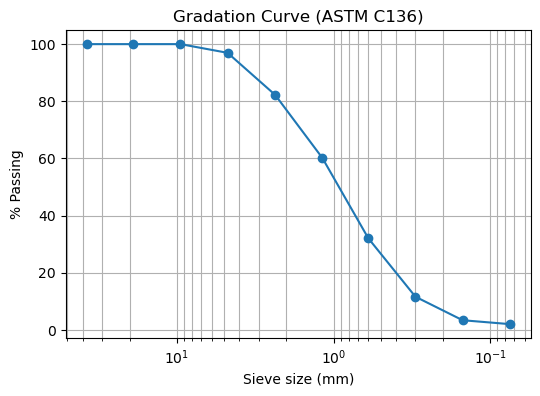

In [21]:

# ▶ Plot (semi‑log x; do not change styles)
plt.figure(figsize=(6,4))
plt.semilogx(df["sieve_mm"].replace(0.0, np.nan), df["pct_passing"], marker="o")  # omit pan from x-axis
plt.gca().invert_xaxis()
plt.xlabel("Sieve size (mm)")
plt.ylabel("% Passing")
plt.title("Gradation Curve (ASTM C136)")
plt.grid(True, which="both")
plt.show()


In [22]:

# ▶ Optional: Fineness Modulus for fine aggregate
# FM = sum of % retained on specified sieves / 100
# Typical FM sieves (mm): 4.75, 2.36, 1.18, 0.600, 0.300, 0.150
FM_SIEVES = {4.75, 2.36, 1.18, 0.600, 0.300, 0.150}
fm = df[df["sieve_mm"].isin(FM_SIEVES)]["pct_retained"].sum() / 100.0
banner("Fineness Modulus")
print("FM:", round_to(fm, 3))


======== Fineness Modulus ========
FM: 0.966



## T85/C127 — Specific Gravity & Absorption of Coarse Aggregate<a id='c127'></a>
Bulk SG(SSD), Bulk SG(OD), Apparent SG, Absorption (%).


In [23]:

# 📥 Input — (Edit here)
m_ssd_air_kg   = 2.615
m_dry_kg       = 2.560
m_submerged_kg = 1.600

# ▶ Calculate
bulk_ssd = safe_div(m_ssd_air_kg, (m_ssd_air_kg - m_submerged_kg))
bulk_od  = safe_div(m_dry_kg,     (m_ssd_air_kg - m_submerged_kg))
apparent = safe_div(m_dry_kg,     (m_dry_kg - m_submerged_kg))
absorp   = ((m_ssd_air_kg - m_dry_kg) / m_dry_kg) * 100.0

banner("C127 Results")
print("Bulk SG (SSD):", round_to(bulk_ssd,3))
print("Bulk SG (OD): ", round_to(bulk_od,3))
print("Apparent SG:  ", round_to(apparent,3))
print("Absorption %: ", round_to(absorp,2))


======== C127 Results ========
Bulk SG (SSD): 2.576
Bulk SG (OD):  2.522
Apparent SG:   2.667
Absorption %:  2.15



## T84/C128 — Specific Gravity & Absorption of Fine Aggregate<a id='c128'></a>
Bulk SG(SSD/OD), Apparent SG, Absorption (%) using pycnometer masses.


In [24]:

# 📥 Input — (Edit here)
m_py_w_ssd_kg = 3.250  # pycnometer + water + SSD sample
m_py_w_kg     = 2.800  # pycnometer + water only
m_dry_kg      = 0.500  # oven-dry sample
m_ssd_kg      = 0.520  # SSD sample mass

# ▶ Calculate
m_eq = (m_py_w_ssd_kg - m_dry_kg) - m_py_w_kg
bulk_ssd = safe_div(m_ssd_kg, (m_ssd_kg - m_eq))
bulk_od  = safe_div(m_dry_kg, (m_ssd_kg - m_eq))
apparent = safe_div(m_dry_kg, (m_dry_kg - m_eq))
absorp   = ((m_ssd_kg - m_dry_kg) / m_dry_kg) * 100.0

banner("C128 Results")
print("Equiv water mass (kg):", round_to(m_eq,4))
print("Bulk SG (SSD):", round_to(bulk_ssd,3))
print("Bulk SG (OD): ", round_to(bulk_od,3))
print("Apparent SG:  ", round_to(apparent,3))
print("Absorption %: ", round_to(absorp,2))


======== C128 Results ========
Equiv water mass (kg): -0.05
Bulk SG (SSD): 0.912
Bulk SG (OD):  0.877
Apparent SG:   0.909
Absorption %:  4.0



## T255/C566 — Total Evaporable Moisture Content of Aggregate (Drying)<a id='c566'></a>
% moisture = ((m_wet − m_dry) / m_dry) × 100


In [25]:

# 📥 Input — (Edit here)
m_wet_kg = 5.000
m_dry_kg = 4.750

# ▶ Calculate
moist_pct = ((m_wet_kg - m_dry_kg) / m_dry_kg) * 100.0
banner("C566 Moisture")
print("Moisture (%):", round_to(moist_pct,2))


======== C566 Moisture ========
Moisture (%): 5.26



## T21/C40 — Organic Impurities in Fine Aggregates<a id='c40'></a>
- **Qualitative / Color** comparison. No numeric calculation in the method.  
- Record: reagent lot, time, temperature, color rating vs standard.


In [26]:

# 📥 Input — (Edit here)
color_result   = "Lighter than standard / Darker than standard"
reagent_lot    = "NaOH soln lot #"
test_time_min  = 24*60
temp_C         = 23
remarks        = "Sample acceptable by color? If darker, run follow-up chemical test per spec."

# ▶ Record
banner("C40 Record")
print("Result:", color_result)
print("Reagent lot:", reagent_lot)
print("Time (min):", test_time_min)
print("Temp (°C):", temp_C)
print("Remarks:", remarks)


======== C40 Record ========
Result: Lighter than standard / Darker than standard
Reagent lot: NaOH soln lot #
Time (min): 1440
Temp (°C): 23
Remarks: Sample acceptable by color? If darker, run follow-up chemical test per spec.
